# Deep learning Neural Network
## Fortuna Zhang

This project is to apply various neural network models for image recognition prediction by simulation study of the impact of network architects on prediction accuracy. 

### 1: Baseline model
First build up the baseline (first) neural network used to classify MNIST digits images.
Out-of-sample accuracy of the trained model is around 0.686.

In [1]:
using Dates, Plots, GLM, Distributions, CSV, InfoZIP
using Flux, Flux.Data.MNIST, Statistics
using Flux: onehotbatch, onecold, crossentropy, throttle
using Base.Iterators: repeated, partition
using Images, ImageMagick, Random


loaded


In [2]:
imgs = MNIST.images(:train)
labels = onehotbatch(MNIST.labels(:train), 0:9)

10×60000 Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}:
 false   true  false  false  false  …  false  false  false  false  false
 false  false  false   true  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false   true  false  false  false
 false  false   true  false  false     false  false  false  false  false
  true  false  false  false  false  …  false  false   true  false  false
 false  false  false  false  false     false  false  false   true  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false      true  false  false  false   true
 false  false  false  false   true     false  false  false  false  false

In [3]:
train = [(cat(float.(imgs[i])..., dims = 4), labels[:,i])
         for i in partition(1:60_000, 1000)]

train = gpu.(train)

60-element Array{Tuple{Array{Float64,4},Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}},1}:
 ([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [false true … false false; false false … false false; … ; false false … false false; false false … false false]) 
 ([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 

In [4]:
tX = cat(float.(MNIST.images(:test)[1:1000])..., dims = 4) |> gpu
tY = onehotbatch(MNIST.labels(:test)[1:1000], 0:9) |> gpu

10×1000 Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}:
 false  false  false   true  false  …  false  false   true  false  false
 false  false   true  false  false     false  false  false  false  false
 false   true  false  false  false      true   true  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false   true     false  false  false  false  false
 false  false  false  false  false  …  false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
  true  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false   true  false
 false  false  false  false  false     false  false  false  false   true

In [8]:
m = Chain(
        Conv((2,2), 1=>16, relu),
        x -> maxpool(x, (2,2)),
        Conv((2,2), 16=>8, relu),
        x -> maxpool(x, (2,2)),
        x -> reshape(x, :, size(x, 4)),
        Dense(288, 10),  
        softmax   
    ) |> gpu

m(tX)  

Tracked 10×1000 Array{Float64,2}:
 0.10002    0.100101   0.0999629  …  0.10005    0.100067   0.100019 
 0.0999298  0.0998407  0.0999342     0.0999373  0.0998701  0.0998891
 0.100047   0.100129   0.100049      0.100026   0.100032   0.100046 
 0.100011   0.0999342  0.0999962     0.100004   0.0999719  0.100022 
 0.100021   0.10002    0.100055      0.0999087  0.099998   0.100009 
 0.099952   0.100042   0.0999979  …  0.0999673  0.0999717  0.0999784
 0.099991   0.099881   0.0998949     0.0999484  0.0999842  0.09999  
 0.100133   0.100222   0.100116      0.100198   0.100235   0.10021  
 0.0999289  0.0999117  0.100016      0.100004   0.0999234  0.0999119
 0.0999673  0.0999178  0.0999772     0.0999566  0.0999467  0.0999254

In [9]:
loss(x, y) = crossentropy(m(x), y)  

accuracy(x, y) = mean(onecold(m(x)) .== onecold(y))

evalcb = throttle(() -> @show(accuracy(tX, tY)), 10)

opt = ADAM(Flux.params(m))

#43 (generic function with 1 method)

In [10]:
Flux.train!(loss, train, opt, cb = evalcb)

accuracy(tX, tY) = 0.099
accuracy(tX, tY) = 0.175
accuracy(tX, tY) = 0.252
accuracy(tX, tY) = 0.36
accuracy(tX, tY) = 0.531
accuracy(tX, tY) = 0.621


In [11]:
accuracy(tX, tY) # on test set

0.654

### 2: Depth of network
Increase the *depth* of the network by 1, 2, 3, 4, and 5 additional Dense(288, 288) layers.
Plot the out-of-sample accuracy of each model as a function of the number of extra layers, starting with 0 (the baseline model) all the way up to 5.

In [13]:
m0 = Chain(
        Conv((2,2), 1=>16, relu),
        x -> maxpool(x, (2,2)),
        Conv((2,2), 16=>8, relu),
        x -> maxpool(x, (2,2)),
        x -> reshape(x, :, size(x, 4)),  
        Dense(288, 10),
        softmax   
    ) |> gpu

loss0(x, y) = crossentropy(m0(x), y)

accuracy0(x, y) = mean(onecold(m0(x)) .== onecold(y))

evalcb0 = throttle(() -> @show(accuracy0(tX, tY)), 10)
opt0 = ADAM(Flux.params(m0))
Flux.train!(loss0, train, opt0, cb = evalcb0)
accuracy0(tX, tY)

accuracy0(tX, tY) = 0.106
accuracy0(tX, tY) = 0.218
accuracy0(tX, tY) = 0.271
accuracy0(tX, tY) = 0.429
accuracy0(tX, tY) = 0.568
accuracy0(tX, tY) = 0.621


0.668

In [14]:
m1 = Chain(
  Conv((2,2), 1=>16, relu),
  x -> maxpool(x, (2,2)),
  Conv((2,2), 16=>8, relu),
  x -> maxpool(x, (2,2)),
  x -> reshape(x, :, size(x, 4)),
  Dense(288, 288), 
  Dense(288, 10), softmax) |> gpu

loss1(x, y) = crossentropy(m1(x), y)

accuracy1(x, y) = mean(onecold(m1(x)) .== onecold(y))

evalcb1 = throttle(() -> @show(accuracy1(tX, tY)), 10)
opt1 = ADAM(Flux.params(m1))
Flux.train!(loss1, train, opt1, cb = evalcb1)
accuracy1(tX, tY)

accuracy1(tX, tY) = 0.088
accuracy1(tX, tY) = 0.126
accuracy1(tX, tY) = 0.126
accuracy1(tX, tY) = 0.536
accuracy1(tX, tY) = 0.686
accuracy1(tX, tY) = 0.755
accuracy1(tX, tY) = 0.789


0.793

In [15]:
m2 = Chain(
  Conv((2,2), 1=>16, relu),
  x -> maxpool(x, (2,2)),
  Conv((2,2), 16=>8, relu),
  x -> maxpool(x, (2,2)),
  x -> reshape(x, :, size(x, 4)),
  Dense(288, 288), 
  Dense(288, 288),
  Dense(288, 10), softmax) |> gpu

loss2(x, y) = crossentropy(m2(x), y)

accuracy2(x, y) = mean(onecold(m2(x)) .== onecold(y))

evalcb2 = throttle(() -> @show(accuracy2(tX, tY)), 10)
opt2 = ADAM(Flux.params(m2))
Flux.train!(loss2, train, opt2, cb = evalcb2)
accuracy2(tX, tY)

accuracy2(tX, tY) = 0.099
accuracy2(tX, tY) = 0.126
accuracy2(tX, tY) = 0.312
accuracy2(tX, tY) = 0.618
accuracy2(tX, tY) = 0.72
accuracy2(tX, tY) = 0.787
accuracy2(tX, tY) = 0.81


0.828

In [16]:
m3 = Chain(
  Conv((2,2), 1=>16, relu),
  x -> maxpool(x, (2,2)),
  Conv((2,2), 16=>8, relu),
  x -> maxpool(x, (2,2)),
  x -> reshape(x, :, size(x, 4)),
  Dense(288, 288), 
  Dense(288, 288),
  Dense(288, 288),
  Dense(288, 10), softmax) |> gpu

loss3(x, y) = crossentropy(m3(x), y)

accuracy3(x, y) = mean(onecold(m3(x)) .== onecold(y))

evalcb3 = throttle(() -> @show(accuracy3(tX, tY)), 10)
opt3 = ADAM(Flux.params(m3))
Flux.train!(loss3, train, opt3, cb = evalcb3)
accuracy3(tX, tY)

accuracy3(tX, tY) = 0.099
accuracy3(tX, tY) = 0.126
accuracy3(tX, tY) = 0.424
accuracy3(tX, tY) = 0.637
accuracy3(tX, tY) = 0.753
accuracy3(tX, tY) = 0.781
accuracy3(tX, tY) = 0.801


0.828

In [17]:
m4 = Chain(
  Conv((2,2), 1=>16, relu),
  x -> maxpool(x, (2,2)),
  Conv((2,2), 16=>8, relu),
  x -> maxpool(x, (2,2)),
  x -> reshape(x, :, size(x, 4)),
  Dense(288, 288), 
  Dense(288, 288),
  Dense(288, 288),
  Dense(288, 288),
  Dense(288, 10), softmax) |> gpu

loss4(x, y) = crossentropy(m4(x), y)

accuracy4(x, y) = mean(onecold(m4(x)) .== onecold(y))

evalcb4 = throttle(() -> @show(accuracy4(tX, tY)), 10)
opt4 = ADAM(Flux.params(m4))
Flux.train!(loss4, train, opt4, cb = evalcb4)
accuracy4(tX, tY)

accuracy4(tX, tY) = 0.099
accuracy4(tX, tY) = 0.126
accuracy4(tX, tY) = 0.126
accuracy4(tX, tY) = 0.436
accuracy4(tX, tY) = 0.664
accuracy4(tX, tY) = 0.772
accuracy4(tX, tY) = 0.839


0.853

In [18]:
m5 = Chain(
  Conv((2,2), 1=>16, relu),
  x -> maxpool(x, (2,2)),
  Conv((2,2), 16=>8, relu),
  x -> maxpool(x, (2,2)),
  x -> reshape(x, :, size(x, 4)),
  Dense(288, 288), 
  Dense(288, 288),
  Dense(288, 288),
  Dense(288, 288),
  Dense(288, 288),
  Dense(288, 10), softmax) |> gpu

loss5(x, y) = crossentropy(m5(x), y)

accuracy5(x, y) = mean(onecold(m5(x)) .== onecold(y))

evalcb5 = throttle(() -> @show(accuracy5(tX, tY)), 10)
opt5 = ADAM(Flux.params(m5))
Flux.train!(loss5, train, opt5, cb = evalcb5)
accuracy5(tX, tY)

accuracy5(tX, tY) = 0.099
accuracy5(tX, tY) = 0.126
accuracy5(tX, tY) = 0.406
accuracy5(tX, tY) = 0.57
accuracy5(tX, tY) = 0.735
accuracy5(tX, tY) = 0.764
accuracy5(tX, tY) = 0.808


0.831

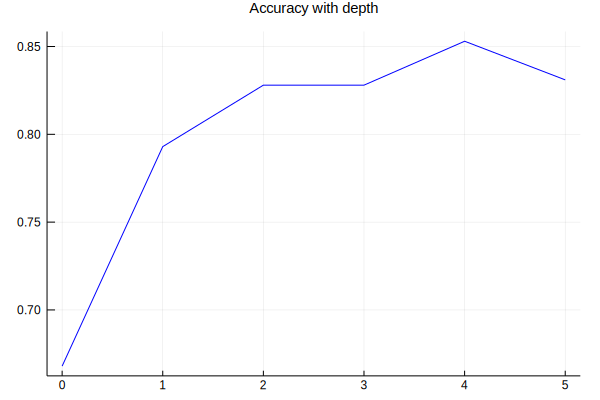

In [19]:
numlayer=0:1:5
y=[accuracy0(tX, tY),accuracy1(tX, tY),accuracy2(tX, tY),accuracy3(tX, tY),accuracy4(tX, tY),accuracy5(tX, tY)]
p1 = plot(numlayer,y,color=:blue,legend=false)
title!("Accuracy with depth",titlefont=font(10))

### 3: Width of network
Increase the *width* of the network by increasing the width of the Dense(288, 288) layer by 5, 10, 15, 20, and 25 percent relative to the baseline model.

Plot the out-of-sample accuracy of each model as a function of the percent increase in width, starting with 0 (the baseline model) all the way up to 25.

In [11]:
m0 = Chain(
        Conv((2,2), 1=>16, relu),
        x -> maxpool(x, (2,2)),
        Conv((2,2), 16=>8, relu),
        x -> maxpool(x, (2,2)),
        x -> reshape(x, :, size(x, 4)),  
        Dense(288, 10),
        softmax   
    ) |> gpu

loss0(x, y) = crossentropy(m0(x), y)

accuracy0(x, y) = mean(onecold(m0(x)) .== onecold(y))

evalcb0 = throttle(() -> @show(accuracy0(tX, tY)), 10)
opt0 = ADAM(Flux.params(m0))
Flux.train!(loss0, train, opt0, cb = evalcb0)
accuracy0(tX, tY)

accuracy0(tX, tY) = 0.173
accuracy0(tX, tY) = 0.143
accuracy0(tX, tY) = 0.173
accuracy0(tX, tY) = 0.31
accuracy0(tX, tY) = 0.507
accuracy0(tX, tY) = 0.603


0.685

In [5]:
m5 = Chain(
  Conv((2,2), 1=>16, relu),
  x -> maxpool(x, (2,2)),
  Conv((2,2), 16=>8, relu),
  x -> maxpool(x, (2,2)),
  x -> reshape(x,:, size(x, 4)),
  Dense(288, 302), 
  Dense(302, 10), softmax) |> gpu

loss5(x, y) = crossentropy(m5(x), y)

accuracy5(x, y) = mean(onecold(m5(x)) .== onecold(y))

evalcb5 = throttle(() -> @show(accuracy5(tX, tY)), 10)
opt5 = ADAM(Flux.params(m5))

Flux.train!(loss5, train, opt5, cb = evalcb5)
accuracy5(tX, tY)

accuracy5(tX, tY) = 0.099
accuracy5(tX, tY) = 0.126
accuracy5(tX, tY) = 0.127
accuracy5(tX, tY) = 0.482
accuracy5(tX, tY) = 0.655
accuracy5(tX, tY) = 0.74


0.778

In [6]:
m10 = Chain(
  Conv((2,2), 1=>16, relu),
  x -> maxpool(x, (2,2)),
  Conv((2,2), 16=>8, relu),
  x -> maxpool(x, (2,2)),
  x -> reshape(x,:, size(x, 4)),
  Dense(288, 317), 
  Dense(317, 10), softmax) |> gpu

loss10(x, y) = crossentropy(m10(x), y)

accuracy10(x, y) = mean(onecold(m10(x)) .== onecold(y))

evalcb10 = throttle(() -> @show(accuracy10(tX, tY)), 10)
opt10 = ADAM(Flux.params(m10))

Flux.train!(loss10, train, opt10, cb = evalcb10)
accuracy10(tX, tY)

accuracy10(tX, tY) = 0.126
accuracy10(tX, tY) = 0.126
accuracy10(tX, tY) = 0.287
accuracy10(tX, tY) = 0.615
accuracy10(tX, tY) = 0.693
accuracy10(tX, tY) = 0.766


0.797

In [7]:
m15 = Chain(
  Conv((2,2), 1=>16, relu),
  x -> maxpool(x, (2,2)),
  Conv((2,2), 16=>8, relu),
  x -> maxpool(x, (2,2)),
  x -> reshape(x,:, size(x, 4)),
  Dense(288, 331), 
  Dense(331, 10), softmax) |> gpu

loss15(x, y) = crossentropy(m15(x), y)

accuracy15(x, y) = mean(onecold(m15(x)) .== onecold(y))

evalcb15 = throttle(() -> @show(accuracy15(tX, tY)), 10)
opt15 = ADAM(Flux.params(m15))

Flux.train!(loss15, train, opt15, cb = evalcb15)
accuracy15(tX, tY)

accuracy15(tX, tY) = 0.126
accuracy15(tX, tY) = 0.126
accuracy15(tX, tY) = 0.129
accuracy15(tX, tY) = 0.597
accuracy15(tX, tY) = 0.631
accuracy15(tX, tY) = 0.743


0.774

In [8]:
m20 = Chain(
  Conv((2,2), 1=>16, relu),
  x -> maxpool(x, (2,2)),
  Conv((2,2), 16=>8, relu),
  x -> maxpool(x, (2,2)),
  x -> reshape(x,:, size(x, 4)),
  Dense(288, 346), 
  Dense(346, 10), softmax) |> gpu

loss20(x, y) = crossentropy(m20(x), y)

accuracy20(x, y) = mean(onecold(m20(x)) .== onecold(y))

evalcb20 = throttle(() -> @show(accuracy20(tX, tY)), 10)
opt20 = ADAM(Flux.params(m20))

Flux.train!(loss20, train, opt20, cb = evalcb20)
accuracy20(tX, tY)

accuracy20(tX, tY) = 0.048
accuracy20(tX, tY) = 0.126
accuracy20(tX, tY) = 0.28
accuracy20(tX, tY) = 0.638
accuracy20(tX, tY) = 0.683
accuracy20(tX, tY) = 0.764


0.814

In [9]:
m25 = Chain(
  Conv((2,2), 1=>16, relu),
  x -> maxpool(x, (2,2)),
  Conv((2,2), 16=>8, relu),
  x -> maxpool(x, (2,2)),
  x -> reshape(x,:, size(x, 4)),
  Dense(288, 360), 
  Dense(360, 10), softmax) |> gpu

loss25(x, y) = crossentropy(m25(x), y)

accuracy25(x, y) = mean(onecold(m25(x)) .== onecold(y))

evalcb25 = throttle(() -> @show(accuracy25(tX, tY)), 10)
opt25 = ADAM(Flux.params(m25))

Flux.train!(loss25, train, opt25, cb = evalcb25)
accuracy25(tX, tY)

accuracy25(tX, tY) = 0.126
accuracy25(tX, tY) = 0.126
accuracy25(tX, tY) = 0.131
accuracy25(tX, tY) = 0.611
accuracy25(tX, tY) = 0.686
accuracy25(tX, tY) = 0.758


0.802

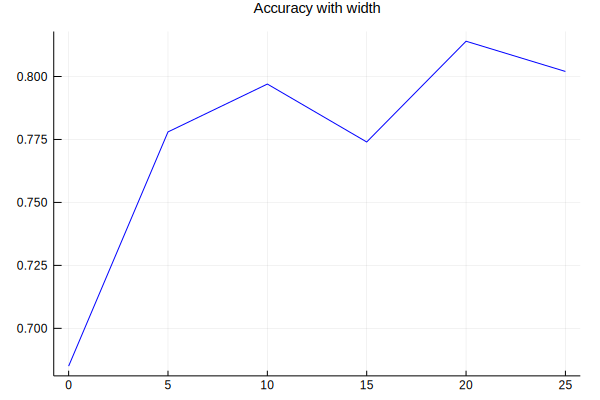

In [12]:
width=0:5:25
y=[accuracy0(tX, tY),accuracy5(tX, tY),accuracy10(tX, tY),accuracy15(tX, tY),accuracy20(tX, tY),accuracy25(tX, tY)]
p2 = plot(width,y,color=:blue,legend=false)
title!("Accuracy with width",titlefont=font(10))

### 4: Loops of network
Increase the number of times the model is trained on the same data. Run 1-10 epochs using @epochs. 

Plot the out-of-sample accuracy of each model as a function of the number epochs, starting with 1 (the baseline model) all the way up to 10.

In [22]:
m0 = Chain(
        Conv((2,2), 1=>16, relu),
        x -> maxpool(x, (2,2)),
        Conv((2,2), 16=>8, relu),
        x -> maxpool(x, (2,2)),
        x -> reshape(x, :, size(x, 4)),  
        Dense(288, 10),
        softmax   
    ) |> gpu

loss0(x, y) = crossentropy(m0(x), y)

accuracy0(x, y) = mean(onecold(m0(x)) .== onecold(y))

evalcb0 = throttle(() -> @show(accuracy0(tX, tY)), 10)
opt0 = ADAM(Flux.params(m0))
Flux.train!(loss0, train, opt0, cb = evalcb0)
epoch1 = accuracy0(tX, tY)

accuracy0(tX, tY) = 0.089
accuracy0(tX, tY) = 0.159
accuracy0(tX, tY) = 0.244
accuracy0(tX, tY) = 0.298
accuracy0(tX, tY) = 0.476
accuracy0(tX, tY) = 0.557
accuracy0(tX, tY) = 0.615


0.641

In [20]:
using Flux: @epochs
@epochs 2 Flux.train!(loss0, train, opt0, cb = evalcb0)
epoch2 = accuracy0(tX, tY)
@epochs 3 Flux.train!(loss0, train, opt0, cb = evalcb0)
epoch3 = accuracy0(tX, tY)
@epochs 4 Flux.train!(loss0, train, opt0, cb = evalcb0)
epoch4 = accuracy0(tX, tY)
@epochs 5 Flux.train!(loss0, train, opt0, cb = evalcb0)
epoch5 = accuracy0(tX, tY)
@epochs 6 Flux.train!(loss0, train, opt0, cb = evalcb0)
epoch6 = accuracy0(tX, tY)
@epochs 7 Flux.train!(loss0, train, opt0, cb = evalcb0)
epoch7 = accuracy0(tX, tY)
@epochs 8 Flux.train!(loss0, train, opt0, cb = evalcb0)
epoch8 = accuracy0(tX, tY)
@epochs 9 Flux.train!(loss0, train, opt0, cb = evalcb0)
epoch9 = accuracy0(tX, tY)
@epochs 10 Flux.train!(loss0, train, opt0, cb = evalcb0)
epoch10 = accuracy0(tX, tY)

┌ Info: Epoch 1
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.667
accuracy0(tX, tY) = 0.693
accuracy0(tX, tY) = 0.733
accuracy0(tX, tY) = 0.771
accuracy0(tX, tY) = 0.79
accuracy0(tX, tY) = 0.813


┌ Info: Epoch 2
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.831
accuracy0(tX, tY) = 0.835
accuracy0(tX, tY) = 0.842
accuracy0(tX, tY) = 0.855
accuracy0(tX, tY) = 0.869
accuracy0(tX, tY) = 0.871


┌ Info: Epoch 1
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.874
accuracy0(tX, tY) = 0.878
accuracy0(tX, tY) = 0.879
accuracy0(tX, tY) = 0.888
accuracy0(tX, tY) = 0.899
accuracy0(tX, tY) = 0.895
accuracy0(tX, tY) = 0.899


┌ Info: Epoch 2
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.897
accuracy0(tX, tY) = 0.9
accuracy0(tX, tY) = 0.906
accuracy0(tX, tY) = 0.904
accuracy0(tX, tY) = 0.905
accuracy0(tX, tY) = 0.914


┌ Info: Epoch 3
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.912
accuracy0(tX, tY) = 0.915
accuracy0(tX, tY) = 0.918
accuracy0(tX, tY) = 0.919
accuracy0(tX, tY) = 0.926
accuracy0(tX, tY) = 0.928


┌ Info: Epoch 1
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.928
accuracy0(tX, tY) = 0.927
accuracy0(tX, tY) = 0.934
accuracy0(tX, tY) = 0.932
accuracy0(tX, tY) = 0.935
accuracy0(tX, tY) = 0.941


┌ Info: Epoch 2
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.937
accuracy0(tX, tY) = 0.937
accuracy0(tX, tY) = 0.942
accuracy0(tX, tY) = 0.939
accuracy0(tX, tY) = 0.944
accuracy0(tX, tY) = 0.947


┌ Info: Epoch 3
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.945
accuracy0(tX, tY) = 0.945
accuracy0(tX, tY) = 0.947
accuracy0(tX, tY) = 0.946
accuracy0(tX, tY) = 0.947
accuracy0(tX, tY) = 0.952


┌ Info: Epoch 4
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.949
accuracy0(tX, tY) = 0.951
accuracy0(tX, tY) = 0.953
accuracy0(tX, tY) = 0.952
accuracy0(tX, tY) = 0.953
accuracy0(tX, tY) = 0.953


┌ Info: Epoch 1
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.954
accuracy0(tX, tY) = 0.953
accuracy0(tX, tY) = 0.957
accuracy0(tX, tY) = 0.956
accuracy0(tX, tY) = 0.956
accuracy0(tX, tY) = 0.956


┌ Info: Epoch 2
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.957
accuracy0(tX, tY) = 0.955
accuracy0(tX, tY) = 0.958
accuracy0(tX, tY) = 0.958
accuracy0(tX, tY) = 0.961
accuracy0(tX, tY) = 0.96


┌ Info: Epoch 3
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.96
accuracy0(tX, tY) = 0.958
accuracy0(tX, tY) = 0.959
accuracy0(tX, tY) = 0.961
accuracy0(tX, tY) = 0.964
accuracy0(tX, tY) = 0.961


┌ Info: Epoch 4
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.962
accuracy0(tX, tY) = 0.961
accuracy0(tX, tY) = 0.962
accuracy0(tX, tY) = 0.963
accuracy0(tX, tY) = 0.965
accuracy0(tX, tY) = 0.962


┌ Info: Epoch 5
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.966
accuracy0(tX, tY) = 0.964
accuracy0(tX, tY) = 0.967
accuracy0(tX, tY) = 0.964
accuracy0(tX, tY) = 0.965
accuracy0(tX, tY) = 0.961


┌ Info: Epoch 1
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.968
accuracy0(tX, tY) = 0.966
accuracy0(tX, tY) = 0.966
accuracy0(tX, tY) = 0.966
accuracy0(tX, tY) = 0.965
accuracy0(tX, tY) = 0.964


┌ Info: Epoch 2
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.969
accuracy0(tX, tY) = 0.965
accuracy0(tX, tY) = 0.968
accuracy0(tX, tY) = 0.968
accuracy0(tX, tY) = 0.967
accuracy0(tX, tY) = 0.966


┌ Info: Epoch 3
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.969
accuracy0(tX, tY) = 0.967
accuracy0(tX, tY) = 0.967
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.967
accuracy0(tX, tY) = 0.969


┌ Info: Epoch 4
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.968
accuracy0(tX, tY) = 0.969
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.967
accuracy0(tX, tY) = 0.971


┌ Info: Epoch 5
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.969
accuracy0(tX, tY) = 0.969
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.967
accuracy0(tX, tY) = 0.972


┌ Info: Epoch 6
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.968
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.968
accuracy0(tX, tY) = 0.972


┌ Info: Epoch 1
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.967
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.971


┌ Info: Epoch 2
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.968
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.97


┌ Info: Epoch 3
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.973
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.969
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.97


┌ Info: Epoch 4
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.973
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.969
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.97


┌ Info: Epoch 5
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.968
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.97


┌ Info: Epoch 6
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.968
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.971


┌ Info: Epoch 7
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.968
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.972


┌ Info: Epoch 1
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.973
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.971


┌ Info: Epoch 2
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.973
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.972


┌ Info: Epoch 3
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.973
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.971


┌ Info: Epoch 4
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.973
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.972


┌ Info: Epoch 5
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.974
accuracy0(tX, tY) = 0.971


┌ Info: Epoch 6
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.969
accuracy0(tX, tY) = 0.973
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.971


┌ Info: Epoch 7
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.969
accuracy0(tX, tY) = 0.973
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.971


┌ Info: Epoch 8
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.969
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.97


┌ Info: Epoch 1
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.974


┌ Info: Epoch 2
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.968
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.975


┌ Info: Epoch 3
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.967
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.976


┌ Info: Epoch 4
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.967
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.976


┌ Info: Epoch 5
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.967
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.973
accuracy0(tX, tY) = 0.976


┌ Info: Epoch 6
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.968
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.976


┌ Info: Epoch 7
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.968
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.976


┌ Info: Epoch 8
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.969
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.973
accuracy0(tX, tY) = 0.975
accuracy0(tX, tY) = 0.97


┌ Info: Epoch 9
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.973
accuracy0(tX, tY) = 0.976
accuracy0(tX, tY) = 0.971


┌ Info: Epoch 1
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.977
accuracy0(tX, tY) = 0.97


┌ Info: Epoch 2
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.969
accuracy0(tX, tY) = 0.975
accuracy0(tX, tY) = 0.968


┌ Info: Epoch 3
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.969
accuracy0(tX, tY) = 0.975
accuracy0(tX, tY) = 0.97


┌ Info: Epoch 4
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.969
accuracy0(tX, tY) = 0.975
accuracy0(tX, tY) = 0.969
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.974
accuracy0(tX, tY) = 0.972


┌ Info: Epoch 5
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.974
accuracy0(tX, tY) = 0.973
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.973
accuracy0(tX, tY) = 0.976
accuracy0(tX, tY) = 0.971


┌ Info: Epoch 6
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.973
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.97
accuracy0(tX, tY) = 0.969
accuracy0(tX, tY) = 0.976
accuracy0(tX, tY) = 0.969


┌ Info: Epoch 7
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.969
accuracy0(tX, tY) = 0.973
accuracy0(tX, tY) = 0.972


┌ Info: Epoch 8
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.973
accuracy0(tX, tY) = 0.974
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.973
accuracy0(tX, tY) = 0.978
accuracy0(tX, tY) = 0.971


┌ Info: Epoch 9
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.973
accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.969
accuracy0(tX, tY) = 0.977
accuracy0(tX, tY) = 0.972


┌ Info: Epoch 10
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


accuracy0(tX, tY) = 0.972
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.971
accuracy0(tX, tY) = 0.969
accuracy0(tX, tY) = 0.974
accuracy0(tX, tY) = 0.973


0.972

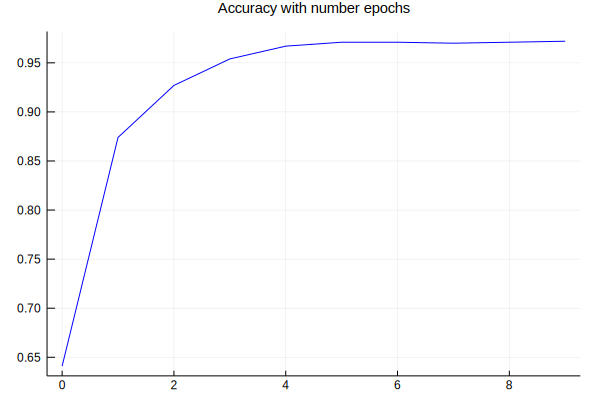

In [25]:
numepoch=0:9
y=[epoch1,epoch2,epoch3,epoch4,epoch5,epoch6,epoch7,epoch8,epoch9,epoch10]
p3 = plot(numepoch,y,color=:blue,legend=false)
title!("Accuracy with number epochs",titlefont=font(10))

### Conclusion


Comparing prediction results of various depth, width or epochs, we can find that "Epochs" make the largest improvement in out-of-sample accuracy that more loops of neural network dramatically enhance the prediction accuracy of image recognition. 